In [17]:
import csv
import numpy

X = numpy.loadtxt(open("PCAdata.csv", "rb"), delimiter=",")


Performing SVD on imported matrix

In [4]:
from scipy import linalg
U,S,V = linalg.svd(X)


cov = 
$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$
Lets say that you have n data points in a p-dimensional space, and X is a p x n matrix of your points then the directions of the principal components are the Eigenvectors of the Covariance matrix $XX^T$

In [72]:
import numpy as np
import math
n_samples = X.shape[1]

centered_matrix = (X - X.mean(axis=1)[:, None])/ math.sqrt(n_samples-1)
cov = np.dot(centered_matrix, centered_matrix.T)
#print(cov)
eigvals, eigvecs = np.linalg.eig(cov)#eig(cov)
sorted_eigvals = sorted(eigvals , reverse=True)
print (sorted_eigvals)
print (eigvals)
print (eigvecs)

[[ 1.08009222  0.46313387  1.08009222]
 [ 0.46313387  0.45745782  0.46313387]
 [ 1.08009222  0.46313387  1.08009222]]
[2.3829744914056259, 0.23466776481580495, 6.3574730850317885e-16]
[  2.38297449e+00   6.35747309e-16   2.34667765e-01]
[[  6.69438214e-01   7.07106781e-01   2.27711392e-01]
 [  3.22032538e-01   1.17771831e-15  -9.46728601e-01]
 [  6.69438214e-01  -7.07106781e-01   2.27711392e-01]]


In [73]:
eigvecs_trans = eigvecs[:,[0,2]]
print(eigvecs_trans)

[[ 0.66943821  0.22771139]
 [ 0.32203254 -0.9467286 ]
 [ 0.66943821  0.22771139]]


### Reconstruction 

In [74]:
Y= np.dot(eigvecs_trans.T, centered_matrix)
print(Y)

[[ -1.48883676e-01  -1.01591685e-01  -4.89669133e-02  -1.53447482e-01
   -1.92176620e-01  -1.51254286e-01  -8.55679611e-02  -7.24621513e-02
   -8.33180676e-02  -1.15239006e-01  -7.47009822e-02  -1.16565833e-01
   -5.36900250e-02  -1.48188761e-01  -6.55905856e-02  -1.30247568e-01
   -9.55914016e-02  -5.71234454e-02  -4.19264761e-02  -1.54887272e-01
   -4.15845085e-02  -4.90316846e-02  -1.15587637e-01  -1.03512955e-01
   -1.26540238e-01  -9.67062443e-02  -8.30413808e-02  -9.15261532e-02
   -5.55801259e-02  -4.98841910e-02  -6.51740725e-02  -1.28946615e-01
   -9.07731440e-02  -8.43626303e-02  -1.53663125e-01  -4.42292880e-02
   -7.16734325e-02  -7.77625621e-02  -7.74096271e-02  -7.64352488e-02
   -1.37499432e-01  -9.22453570e-02  -9.47806040e-02  -1.08969066e-01
   -1.56463733e-02  -1.37207201e-01  -1.05426169e-01  -1.51997380e-01
   -1.55451769e-01  -1.17595155e-01  -1.11342905e-01  -1.39598640e-02
   -9.63610580e-02  -1.56057016e-01  -2.32566078e-02  -3.38176094e-02
   -1.08197555e-01  

### Plotting PCA Dibiased, Scaled data

200


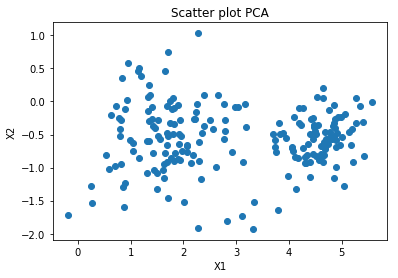

In [33]:
X1 = Y[0]
X2 = Y[1]
#print (len(X1))
import matplotlib.pyplot as plt
# Plot
plt.scatter(X1, X2)
plt.title('Scatter plot PCA')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

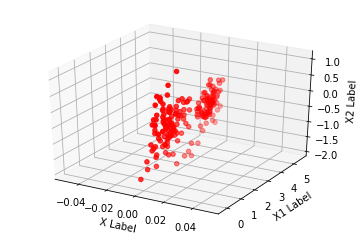

In [40]:


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.zeros(200)
y = X1
z = X2



ax.scatter(x, y, z, c='r', marker='o', label = 'PCA dibased')

ax.set_xlabel('X Label')
ax.set_ylabel(' X1 Label')
ax.set_zlabel('X2 Label')

plt.show()

### Using SVD on dibased, Scaled data

In [52]:
# Scaling data
scaled_data = centered_matrix/ math.sqrt(n_samples -1)
U1, S1, V1 = linalg.svd(scaled_data)
Y= np.dot(U1.T, scaled_data)
print (Y)

[[  1.48883676e-01   1.01591685e-01   4.89669133e-02   1.53447482e-01
    1.92176620e-01   1.51254286e-01   8.55679611e-02   7.24621513e-02
    8.33180676e-02   1.15239006e-01   7.47009822e-02   1.16565833e-01
    5.36900250e-02   1.48188761e-01   6.55905856e-02   1.30247568e-01
    9.55914016e-02   5.71234454e-02   4.19264761e-02   1.54887272e-01
    4.15845085e-02   4.90316846e-02   1.15587637e-01   1.03512955e-01
    1.26540238e-01   9.67062443e-02   8.30413808e-02   9.15261532e-02
    5.55801259e-02   4.98841910e-02   6.51740725e-02   1.28946615e-01
    9.07731440e-02   8.43626303e-02   1.53663125e-01   4.42292880e-02
    7.16734325e-02   7.77625621e-02   7.74096271e-02   7.64352488e-02
    1.37499432e-01   9.22453570e-02   9.47806040e-02   1.08969066e-01
    1.56463733e-02   1.37207201e-01   1.05426169e-01   1.51997380e-01
    1.55451769e-01   1.17595155e-01   1.11342905e-01   1.39598640e-02
    9.63610580e-02   1.56057016e-01   2.32566078e-02   3.38176094e-02
    1.08197555e-01  

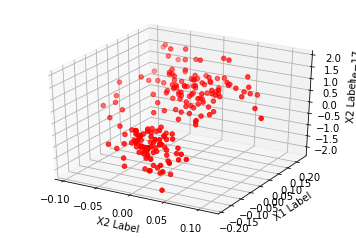

In [51]:
# Plotting data
X1= Y[0]
X2 = Y[1]
X3 = Y[2]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X2
y = X1
z = X3

ax.scatter(x, y, z, c='r', marker='o', label = 'PCA dibased')

ax.set_xlabel('X2 Label')
ax.set_ylabel(' X1 Label')
ax.set_zlabel('X2 Label')

plt.show()